# Introduction
Implementation of tutorial  located at https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html

### Imports
Import libraries and write settings here.

In [36]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Analysis/Modeling
Do work here

In [37]:
# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# datasets
trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [38]:
# We’ll define a similar model architecture from that tutorial, 
# making only minor modifications to account for the fact that the images are 
# now one channel instead of three and 28x28 instead of 32x32:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [39]:
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [40]:
# We’ll define the same optimizer and criterion from before:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# TensorBoard setup

In [41]:
# Now we’ll set up TensorBoard, importing tensorboard from torch.utils and defining a SummaryWriter, 
# our key object for writing information to TensorBoard.

from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

## Writing to TensorBoard

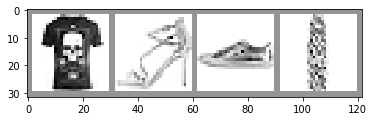

In [42]:
# Now let’s write an image to our TensorBoard - specifically, a grid - using make_grid.

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

In [43]:
#run tensorboard (type following at commandline while in this folder)
#tensorboard --logdir=runs

## Inspect model using tensorboard

In [44]:
writer.add_graph(net, images)
writer.close()
#go check out the graph tab in tensorboard, and then look at the nets components

## Add a projector to tensorboard

In [45]:
# import pixiedust

In [46]:
# want to see what attributes and functions are available in an object (__dict__)
import pprint
pprint.pprint(trainset.__dict__)

{'root': './data',
 'target_transform': None,
 'train': True,
 'train_data': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

     

In [47]:
writer.__dict__

{'log_dir': 'runs/fashion_mnist_experiment_1',
 'purge_step': None,
 'max_queue': 10,
 'flush_secs': 120,
 'filename_suffix': '',
 'file_writer': None,
 'all_writers': None,
 'default_bins': [-9.920775621859783e+19,
  -9.018886928963438e+19,
  -8.198988117239489e+19,
  -7.453625561126807e+19,
  -6.776023237388005e+19,
  -6.160021124898186e+19,
  -5.600019204452896e+19,
  -5.090926549502632e+19,
  -4.628115045002392e+19,
  -4.2073773136385384e+19,
  -3.824888466944125e+19,
  -3.477171333585568e+19,
  -3.1610648487141528e+19,
  -2.873695317012866e+19,
  -2.6124502881935143e+19,
  -2.3749548074486493e+19,
  -2.1590498249533174e+19,
  -1.962772568139379e+19,
  -1.7843386983085265e+19,
  -1.6221260893713875e+19,
  -1.4746600812467157e+19,
  -1.3406000738606506e+19,
  -1.2187273398733187e+19,
  -1.1079339453393805e+19,
  -1.0072126775812549e+19,
  -9.156478887102316e+18,
  -8.324071715547559e+18,
  -7.567337923225053e+18,
  -6.879398112022775e+18,
  -6.253998283657068e+18,
  -5.6854529851427

In [48]:
# %%pixie_debugger
# helper function
def select_n_random(data, labels, n=100):
    '''
    Selects n random datapoints and their corresponding labels from a dataset
    '''
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# NOTE: PREVIOUS CELLS CLOSED WRITER, REOPEN IT HERE
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

# select random images and their target indices
images, labels = select_n_random(trainset.train_data, trainset.train_labels)

# get the class labels for each image
class_labels = [classes[lab] for lab in labels]

print (f'number images {len(images)}')
# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.close()

number images 100


## Tracking Model training with tensorboard

In [49]:
# n the previous example, we simply printed the model’s running loss every 2000 iterations. 
# Now, we’ll instead log the running loss to TensorBoard, along with a view into the predictions 
# the model is making via the plot_classes_preds function.

# helper functions

def images_to_probs(net, images):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = net(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]


def plot_classes_preds(net, images, labels):
    '''
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_probs" function.
    '''
    preds, probs = images_to_probs(net, images)
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig

In [ ]:
# Finally, let’s train the model using the same model training code from the prior tutorial, 
# but writing results to TensorBoard every 1000 batches instead of printing to console;
# this is done using the add_scalar function.

# In addition, as we train, we’ll generate an image showing the model’s predictions vs. the 
# actual results on the four images included in that batch.

running_loss = 0.0
for epoch in range(1):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # every 1000 mini-batches...

            # ...log the running loss
            writer.add_scalar('training loss',
                            running_loss / 1000,
                            epoch * len(trainloader) + i)

            # ...log a Matplotlib Figure showing the model's predictions on a
            # random mini-batch
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(net, inputs, labels),
                            global_step=epoch * len(trainloader) + i)
            running_loss = 0.0
print('Finished Training')

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here